In [1]:
%matplotlib notebook

In [2]:

import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import numpy as np
import os

In [3]:
Westcoarst_bus = pd.read_csv('UPS.csv')

/Users/z/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
Westcoarst_bus

,Region Num,District Num,Account Name,Account Num,Source System Existence Ind,Employee Mgr Name,Employee Name,Employee Mgr ID,Employee ID,Employee Role Type Cd,...,DnB Bus Employees Total,DnB Employee Growth Pct,DnB Sales Growth Pct,DnB Bus Total Gross Revenue USD,DnB Primary SIC Industry 2 Cd,DnB Primary SIC Industry 2 Descr,DnB Primary SIC Industry 4 Cd,DnB Primary SIC Industry 4 Descr,DnB Bus Num Of Clients,DnB Bus Property Size
0,3,92,BALLYMORE COMPANY INC,30R9V2,1,"D'ANDUONO, GERARD","YOUNG BOGDAN, JAIMIE",64178,1681446,J2,...,1,0,0,62343.0,34,Fabricated Metal Products,3499,"Fabricated Metal Products, Nec",0,0
1,7,20,077645 MISTRAS 100 PRODUCTS,077645,1,"BARNETT, VENITTA","HOEY, DAVID",359912,3894418,E,...,5600,5,4,742354000.0,87,"Engineering, Accounting, Research, and Managem...",8711,Engineering Services,0,0
2,7,20,1 SOURCE VIDEO,3E846E,1,"BARNETT, VENITTA","HUBLER, CONNOR",359912,4730509,E,...,65,0,0,30594240.0,50,Wholesale Trade - Durable Goods,5045,"Computers, peripherals, and software",0,65000
3,7,20,"10-31, INC.",064298,1,"DORMAN, JESSICA","TRIMMER, ALLEN",4229736,4221038,E,...,23,0,6,5112233.0,25,Furniture and Fixtures,2541,Wood Partitions and Fixtures,1200,18000
4,7,20,1199 SEIU,544A9X,1,"PASCALE, AMADEO","D'ALESSIO, JULIANNE",358601,4751855,E,...,16,0,8,2238003.0,60,Depository Institutions,6061,Federal Credit Unions,0,0
5,7,20,1199 SEIU,V4X370,1,"PASCALE, AMADEO","D'ALESSIO, JULIANNE",358601,4751855,E,...,99,0,0,3933265.0,48,Communications,4813,"Telephone communication, except radio",0,0
6,7,20,12.29,1EW315,1,"ROZEWSKI, KENNETH","HERNANDEZ, HUMBERTO",51719,0366880,J2,...,3,0,0,271330.0,51,Wholesale Trade - Nondurable Goods,5199,"Nondurable Goods, Nec",0,0
7,7,20,123SECURITYPRODUCTS.COM,183A9V,1,"SPARLING, KEVIN","HERNANDEZ, KEVIN",368607,5059223,S,...,14,0,0,1334557.0,73,Business Services,7382,Security Systems Services,0,0
8,7,20,123STORES INC.,223W63,1,"LEICHTLE, FRANK","MCNIFF, SHAWN",362754,1462895,S,...,2,0,0,179398290.0,59,Miscellaneous Retail,5961,Catalog and Mail-order Houses,0,0
9,7,20,"123STORES, INC.",Y867A7,1,"LEICHTLE, FRANK","MCNIFF, SHAWN",362754,1462895,S,...,2,0,0,179398290.0,59,Miscellaneous Retail,5961,Catalog and Mail-order Houses,0,0


In [5]:
# A snapshot look at all the columns
for col in Westcoarst_bus.columns:
    print(col)

Region Num
District Num
Account Name
Account Num
Source System Existence Ind
Employee Mgr Name
Employee Name
Employee Mgr ID
Employee ID
Employee Role Type Cd
Addr City Name
Addr State Cd
Addr Postal Code Main
Year
UPS Shipping Revenue
DnB DUNS Num
DnB Bus Name
DnB Num Of UPS Accounts
DnB Active Ind
DnB Marketable Ind
DnB Subsidiary Cd
DnB Subsidiary Descr
DnB Bus Street
DnB Bus City Name
DnB Bus State Province Cd
DnB Bus Postal Code Main
DnB Bus Country Cd
DnB Latitude Num
DnB Longitude Num
DnB Bus Employees Here
DnB Bus Employees Total
DnB Employee Growth Pct
DnB Sales Growth Pct
DnB Bus Total Gross Revenue USD
DnB Primary SIC Industry 2 Cd
DnB Primary SIC Industry 2 Descr
DnB Primary SIC Industry 4 Cd
DnB Primary SIC Industry 4 Descr
DnB Bus Num Of Clients
DnB Bus Property Size


In [6]:
New_data = Westcoarst_bus.copy()

In [7]:
# pulling out relevant column from the giant csv files from dun and bradstreet
Business_df = New_data[["DnB Bus Name","DnB Num Of UPS Accounts","DnB Bus City Name",
                        "DnB Bus Postal Code Main","DnB Latitude Num","DnB Longitude Num","DnB Subsidiary Cd","DnB Bus Num Of Clients","DnB Bus Employees Here","DnB Employee Growth Pct",
                       "DnB Bus Employees Total","DnB Sales Growth Pct",
                       "DnB Bus Total Gross Revenue USD","UPS Shipping Revenue","DnB Primary SIC Industry 2 Descr","DnB Primary SIC Industry 4 Cd"]]

In [8]:
Clean_Busi_df = Business_df.rename(columns = {"DnB Bus Name":"Company Name","DnB Num Of UPS Accounts":"Num of UPS accounts","DnB Bus City Name":"City",
                        "DnB Bus Postal Code Main":"Postal Code","DnB Latitude Num":"Latitude","DnB Longitude Num":"Longitude","DnB Subsidiary Cd":"Subsidiary","DnB Bus Num Of Clients":"Num of Clients","DnB Bus Employees Here":"Employee Here","DnB Employee Growth Pct":"Employee Growth Pct",
                       "DnB Bus Employees Total":"Total Employee","DnB Sales Growth Pct":"Sales Growth",
                       "DnB Bus Total Gross Revenue USD":"Total Revenue in USD","UPS Shipping Revenue in USD":"Shipping Revenue in USD","DnB Primary SIC Industry 2 Descr":"Type of industry","DnB Primary SIC Industry 4 Cd":"Industry Sub-Segment"})

In [9]:
Clean_Busi_df.columns

Index(['Company Name', 'Num of UPS accounts', 'City', 'Postal Code',
       'Latitude', 'Longitude', 'Subsidiary', 'Num of Clients',
       'Employee Here', 'Employee Growth Pct', 'Total Employee',
       'Sales Growth', 'Total Revenue in USD', 'UPS Shipping Revenue',
       'Type of industry', 'Industry Sub-Segment'],
      dtype='object')

In [10]:
Clean_Busi_df

,Company Name,Num of UPS accounts,City,Postal Code,Latitude,Longitude,Subsidiary,Num of Clients,Employee Here,Employee Growth Pct,Total Employee,Sales Growth,Total Revenue in USD,UPS Shipping Revenue,Type of industry,Industry Sub-Segment
0,"BALLYMORE COMPANY, INC.",0,COATESVILLE,19320,39.97,-75.88,2,0,1,0,1,0,62343.0,380860.67,Fabricated Metal Products,3499
1,"MISTRAS GROUP, INC.",0,PRINCETON JUNCTION,8550,40.29,-74.64,1,0,135,5,5600,4,742354000.0,160855.42,"Engineering, Accounting, Research, and Managem...",8711
2,1SOURCEVIDEO.COM LLC,0,HAZLET,7730,40.42,-74.15,1,0,21,0,65,0,30594240.0,252725.70,Wholesale Trade - Durable Goods,5045
3,10-31 INCORPORATED,0,COLUMBIA,7832,40.96,-75.03,1,1200,23,0,23,6,5112233.0,112249.24,Furniture and Fixtures,2541
4,1199 SEIU,0,NEW YORK,10036,40.75,-73.98,1,0,16,0,16,8,2238003.0,27227.11,Depository Institutions,6061
5,"SEIU-CC, LLC",0,NEW YORK,10036,40.75,-73.99,2,0,99,0,99,0,3933265.0,13031.09,Communications,4813
6,ADVANCED DISTRIBUTION SVC,0,BLAUVELT,10913,41.07,-73.94,1,0,3,0,3,0,271330.0,3158.79,Wholesale Trade - Nondurable Goods,5199
7,"CANAL ALARM DEVICES, INC.",0,RONKONKOMA,11779,40.79,-73.11,1,0,14,0,14,0,1334557.0,285424.48,Business Services,7382
8,"123STORES, INC.",0,LONG ISLAND CITY,11101,40.74,-73.92,2,0,2,0,2,0,179398290.0,2831741.21,Miscellaneous Retail,5961
9,"123STORES, INC.",0,LONG ISLAND CITY,11101,40.74,-73.92,2,0,2,0,2,0,179398290.0,1454.36,Miscellaneous Retail,5961


In [11]:
nn = Clean_Busi_df.sort_values(by=['Total Revenue in USD'], ascending=False)

In [12]:
nn

,Company Name,Num of UPS accounts,City,Postal Code,Latitude,Longitude,Subsidiary,Num of Clients,Employee Here,Employee Growth Pct,Total Employee,Sales Growth,Total Revenue in USD,UPS Shipping Revenue,Type of industry,Industry Sub-Segment
15463,UNITED REFINING COMPANY,0,WARREN,16365,41.82,-79.12,2,0,201,0,4207,-23,2.086625e+09,17345.98,Automotive Dealers and Gasoline Service Stations,5541
21128,"MAINES PAPER & FOOD SERVICE, INC.",0,CONKLIN,13748,42.04,-75.81,1,4500,700,0,1000,0,1.926597e+09,161.00,Wholesale Trade - Nondurable Goods,5142
7217,THE NEW YORK TIMES COMPANY,0,NEW YORK,10018,40.75,-73.99,1,0,277,6,3790,10,1.748598e+09,17518.17,"Printing, Publishing and Allied Industries",2711
19278,"WEST PHARMACEUTICAL SERVICES, INC.",0,EXTON,19341,40.06,-75.67,1,0,320,5,7500,22,1.717400e+09,197428.22,Rubber and Miscellaneous Plastic Products,3069
10826,"VILLAGE SUPER MARKET, INC.",0,SPRINGFIELD,7081,40.69,-74.33,1,0,120,0,6742,1,1.612015e+09,22725.16,Food Stores,5411
21314,NATIONAL FUEL GAS COMPANY,0,WILLIAMSVILLE,14221,42.96,-78.71,1,0,124,-1,2105,-9,1.592668e+09,175187.02,"Electric, Gas and Sanitary Services",4924
312,ADVANSIX INC.,0,PARSIPPANY,7054,40.85,-74.40,1,0,277,0,1510,0,1.514984e+09,40520.35,Chemicals and Allied Products,2899
313,ADVANSIX INC.,0,PARSIPPANY,7054,40.85,-74.40,1,0,277,0,1510,0,1.514984e+09,293.34,Chemicals and Allied Products,2899
314,ADVANSIX INC.,0,PARSIPPANY,7054,40.85,-74.40,1,0,277,0,1510,0,1.514984e+09,35.30,Chemicals and Allied Products,2899
340,"ARO LIQUIDATION, INC.",0,LYNDHURST,7071,40.80,-74.09,1,0,640,-3,20330,0,1.506867e+09,1196722.38,Apparel and Accessory Stores,5621


In [13]:
MLM = nn.drop(columns = ["Num of UPS accounts","City", "Postal Code", "Latitude","Longitude","Industry Sub-Segment"])

In [14]:
MLM

,Company Name,Subsidiary,Num of Clients,Employee Here,Employee Growth Pct,Total Employee,Sales Growth,Total Revenue in USD,UPS Shipping Revenue,Type of industry
15463,UNITED REFINING COMPANY,2,0,201,0,4207,-23,2.086625e+09,17345.98,Automotive Dealers and Gasoline Service Stations
21128,"MAINES PAPER & FOOD SERVICE, INC.",1,4500,700,0,1000,0,1.926597e+09,161.00,Wholesale Trade - Nondurable Goods
7217,THE NEW YORK TIMES COMPANY,1,0,277,6,3790,10,1.748598e+09,17518.17,"Printing, Publishing and Allied Industries"
19278,"WEST PHARMACEUTICAL SERVICES, INC.",1,0,320,5,7500,22,1.717400e+09,197428.22,Rubber and Miscellaneous Plastic Products
10826,"VILLAGE SUPER MARKET, INC.",1,0,120,0,6742,1,1.612015e+09,22725.16,Food Stores
21314,NATIONAL FUEL GAS COMPANY,1,0,124,-1,2105,-9,1.592668e+09,175187.02,"Electric, Gas and Sanitary Services"
312,ADVANSIX INC.,1,0,277,0,1510,0,1.514984e+09,40520.35,Chemicals and Allied Products
313,ADVANSIX INC.,1,0,277,0,1510,0,1.514984e+09,293.34,Chemicals and Allied Products
314,ADVANSIX INC.,1,0,277,0,1510,0,1.514984e+09,35.30,Chemicals and Allied Products
340,"ARO LIQUIDATION, INC.",1,0,640,-3,20330,0,1.506867e+09,1196722.38,Apparel and Accessory Stores


In [15]:
company_group = MLM.groupby('Type of industry')['Sales Growth'].mean()
com = company_group.sort_values(ascending = False)[:30]
#company_growth = company_group['Type of industry'].sum()[:50]

In [16]:
com

Type of industry
Membership Organizations                                       176.715116
Insurance Carriers                                               9.760000
Educational Services                                             8.442623
Depository Institutions                                          6.818182
Stone, Clay, Glass, and Concrete Products                        3.595588
Chemicals and Allied Products                                    2.921722
Miscellaneous Retail                                             1.874136
Agricultural Services                                            1.755556
Social Services                                                  1.666667
Food and Kindred Products                                        1.511936
Health Services                                                  1.502703
Apparel and Accessory Stores                                     1.463443
Measuring, Photographic, Medical, & Optical Goods, & Clocks      1.415913
Eating and Drinking P

In [17]:
MLM['Type of industry'].unique().shape

(77,)

In [18]:
company_group = MLM.groupby('Type of industry')['Total Revenue in USD'].mean()
Revenue = company_group.sort_values(ascending = False)[:50]

In [19]:
Revenue

Type of industry
Railroad Transportation                                         1.097436e+08
Insurance Carriers                                              1.000784e+08
Hotels, Rooming Houses, Camps, and Other Lodging Places         9.907643e+07
Depository Institutions                                         8.109747e+07
Electric, Gas and Sanitary Services                             6.570296e+07
Mining and Quarrying of Nonmetallic Minerals, Except Fuels      6.564705e+07
Nondepository Credit Institutions                               5.797116e+07
Security & Commodity Brokers, Dealers, Exchanges & Services     5.516655e+07
Heamy Construction, Except Building Construction, Contractor    5.221889e+07
Electronic & Other Electrical Equipment & Components            3.012603e+07
Food and Kindred Products                                       2.716235e+07
Chemicals and Allied Products                                   2.691925e+07
Paper and Allied Products                                  

In [20]:
MLM_rearrange = MLM[["Company Name","Subsidiary","Num of Clients","Employee Here","Employee Growth Pct","Total Employee","Sales Growth","Total Revenue in USD","UPS Shipping Revenue","Type of industry"]]

In [21]:
MLM_rearrange

,Company Name,Subsidiary,Num of Clients,Employee Here,Employee Growth Pct,Total Employee,Sales Growth,Total Revenue in USD,UPS Shipping Revenue,Type of industry
15463,UNITED REFINING COMPANY,2,0,201,0,4207,-23,2.086625e+09,17345.98,Automotive Dealers and Gasoline Service Stations
21128,"MAINES PAPER & FOOD SERVICE, INC.",1,4500,700,0,1000,0,1.926597e+09,161.00,Wholesale Trade - Nondurable Goods
7217,THE NEW YORK TIMES COMPANY,1,0,277,6,3790,10,1.748598e+09,17518.17,"Printing, Publishing and Allied Industries"
19278,"WEST PHARMACEUTICAL SERVICES, INC.",1,0,320,5,7500,22,1.717400e+09,197428.22,Rubber and Miscellaneous Plastic Products
10826,"VILLAGE SUPER MARKET, INC.",1,0,120,0,6742,1,1.612015e+09,22725.16,Food Stores
21314,NATIONAL FUEL GAS COMPANY,1,0,124,-1,2105,-9,1.592668e+09,175187.02,"Electric, Gas and Sanitary Services"
312,ADVANSIX INC.,1,0,277,0,1510,0,1.514984e+09,40520.35,Chemicals and Allied Products
313,ADVANSIX INC.,1,0,277,0,1510,0,1.514984e+09,293.34,Chemicals and Allied Products
314,ADVANSIX INC.,1,0,277,0,1510,0,1.514984e+09,35.30,Chemicals and Allied Products
340,"ARO LIQUIDATION, INC.",1,0,640,-3,20330,0,1.506867e+09,1196722.38,Apparel and Accessory Stores


In [22]:
MLM_rearrange.shape

(22517, 10)

In [23]:
MLM_reduced = MLM_rearrange.dropna()

In [24]:
MLM_reduced.shape

(22492, 10)

In [25]:
MLM_csv = MLM_reduced.drop(columns = ['Company Name'],inplace = False)

MLM_csv = MLM_csv.loc[(MLM_csv['Total Revenue in USD']) > 100000]

MLM_csv.shape

(17859, 9)

In [26]:
MLM_csv.to_csv("Business_records.csv")

In [27]:
test = MLM_csv.sort_values(by='Total Revenue in USD', ascending=True)
test = test[["Subsidiary","Num of Clients","Employee Here","Employee Growth Pct","Total Employee","Sales Growth","Total Revenue in USD","Type of industry","UPS Shipping Revenue"]]
test

,Subsidiary,Num of Clients,Employee Here,Employee Growth Pct,Total Employee,Sales Growth,Total Revenue in USD,Type of industry,UPS Shipping Revenue
20664,1,0,2,0,2,0,1.000030e+05,Real Estate,20497.91
2905,1,0,2,0,2,0,1.001880e+05,Apparel and Accessory Stores,105315.93
18872,1,0,3,0,3,0,1.003230e+05,Personal Services,43844.73
13375,1,0,1,0,1,0,1.004100e+05,Wholesale Trade - Durable Goods,161676.06
8934,1,0,3,0,3,0,1.004150e+05,Insurance Carriers,29757.12
3631,1,0,2,0,2,0,1.004650e+05,Transportation Services,11212.20
3237,1,0,2,0,2,0,1.005390e+05,"Measuring, Photographic, Medical, & Optical Go...",133161.29
9564,1,0,1,0,1,0,1.005520e+05,Wholesale Trade - Durable Goods,119722.53
19920,1,0,2,0,2,0,1.005660e+05,Apparel and Accessory Stores,76327.41
17328,1,0,2,0,2,0,1.005900e+05,"Apparel, Finished Products from Fabrics & Simi...",32874.03


In [28]:
# greating two dimentional array for X and y
X = MLM_csv["Total Revenue in USD"].values.reshape(-1,1)
y = MLM_csv["UPS Shipping Revenue"].values.reshape(-1,1)
X.shape
y.shape

(17859, 1)

In [29]:
test1 = test.copy()

In [30]:
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
#Preprocess data using MinMaxScaler
import matplotlib.pyplot as plt

#Let's drop the string features and use the numerical so that the machine understands it
test1 = test.drop(columns="Type of industry") #For our training set

scaler = MinMaxScaler()
scaler.fit(test1)
transformed = scaler.transform(test1)
transformed = pd.DataFrame(test1)
transformed.head()
transformed = transformed.fillna(0)
#With this the machine can understand what we will train

In [31]:
transformed.head()

,Subsidiary,Num of Clients,Employee Here,Employee Growth Pct,Total Employee,Sales Growth,Total Revenue in USD,UPS Shipping Revenue
20664,1,0,2,0,2,0,100003.0,20497.91
2905,1,0,2,0,2,0,100188.0,105315.93
18872,1,0,3,0,3,0,100323.0,43844.73
13375,1,0,1,0,1,0,100410.0,161676.06
8934,1,0,3,0,3,0,100415.0,29757.12


In [33]:
y = transformed["UPS Shipping Revenue"].values.reshape(-1, 1)
X = transformed.drop(columns=["UPS Shipping Revenue"])

In [56]:
from sklearn.model_selection import train_test_split
X_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.6, random_state=42)

In [57]:
X_train.head()

,Subsidiary,Num of Clients,Employee Here,Employee Growth Pct,Total Employee,Sales Growth,Total Revenue in USD
10403,1,3000,180,80,180,0,78498189.0
7151,1,0,3,0,3,0,333156.0
19359,1,0,4,0,4,0,475000.0
21438,1,0,30,0,30,0,1541219.0
17052,1,200,40,0,40,0,10761665.0


-----------------
Feature Selection: Pearson



<IPython.core.display.Javascript object>


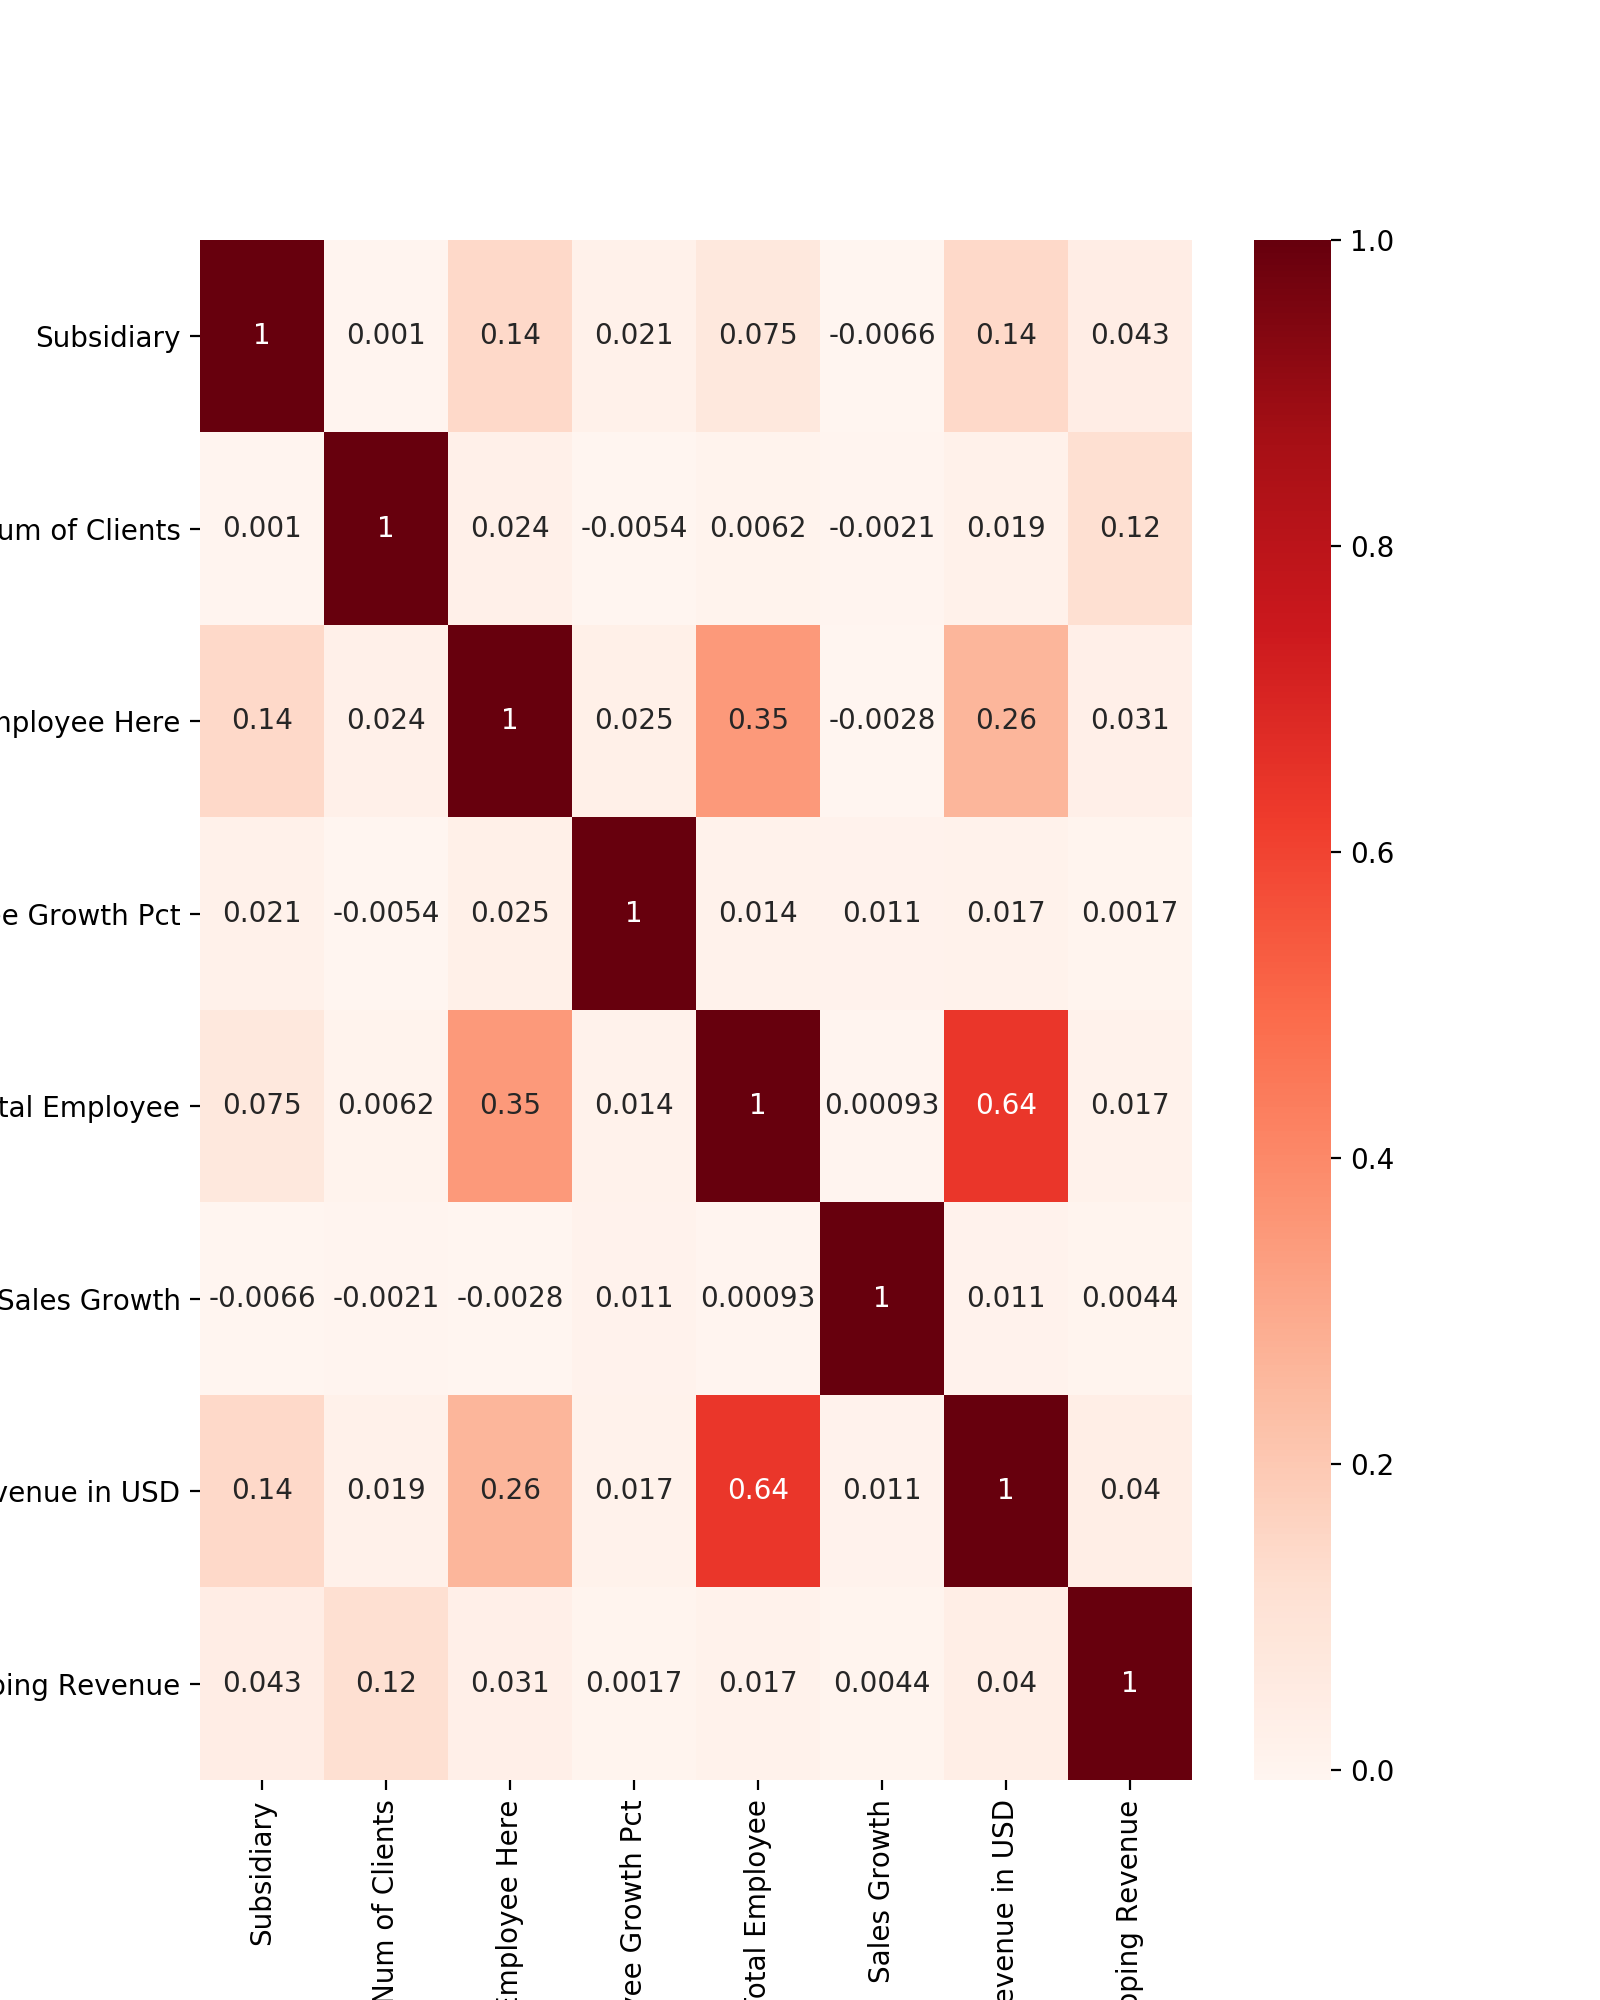

In [58]:
import seaborn as sns

print("-----------------\nFeature Selection: Pearson\n")
plt.figure(figsize=(8,10))
cor = test1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.savefig("corrgram.png")
plt.show()

In [59]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm, datasets
#GRID SEARCH CROSS VALIDATION
svc = svm.SVR()
svc.fit(X_train, y_train)
y_pred = svc.predict(x_test)
print(y_pred)



[26218.85 26218.85 26218.85 ... 26218.85 26218.85 26218.85]


<IPython.core.display.Javascript object>


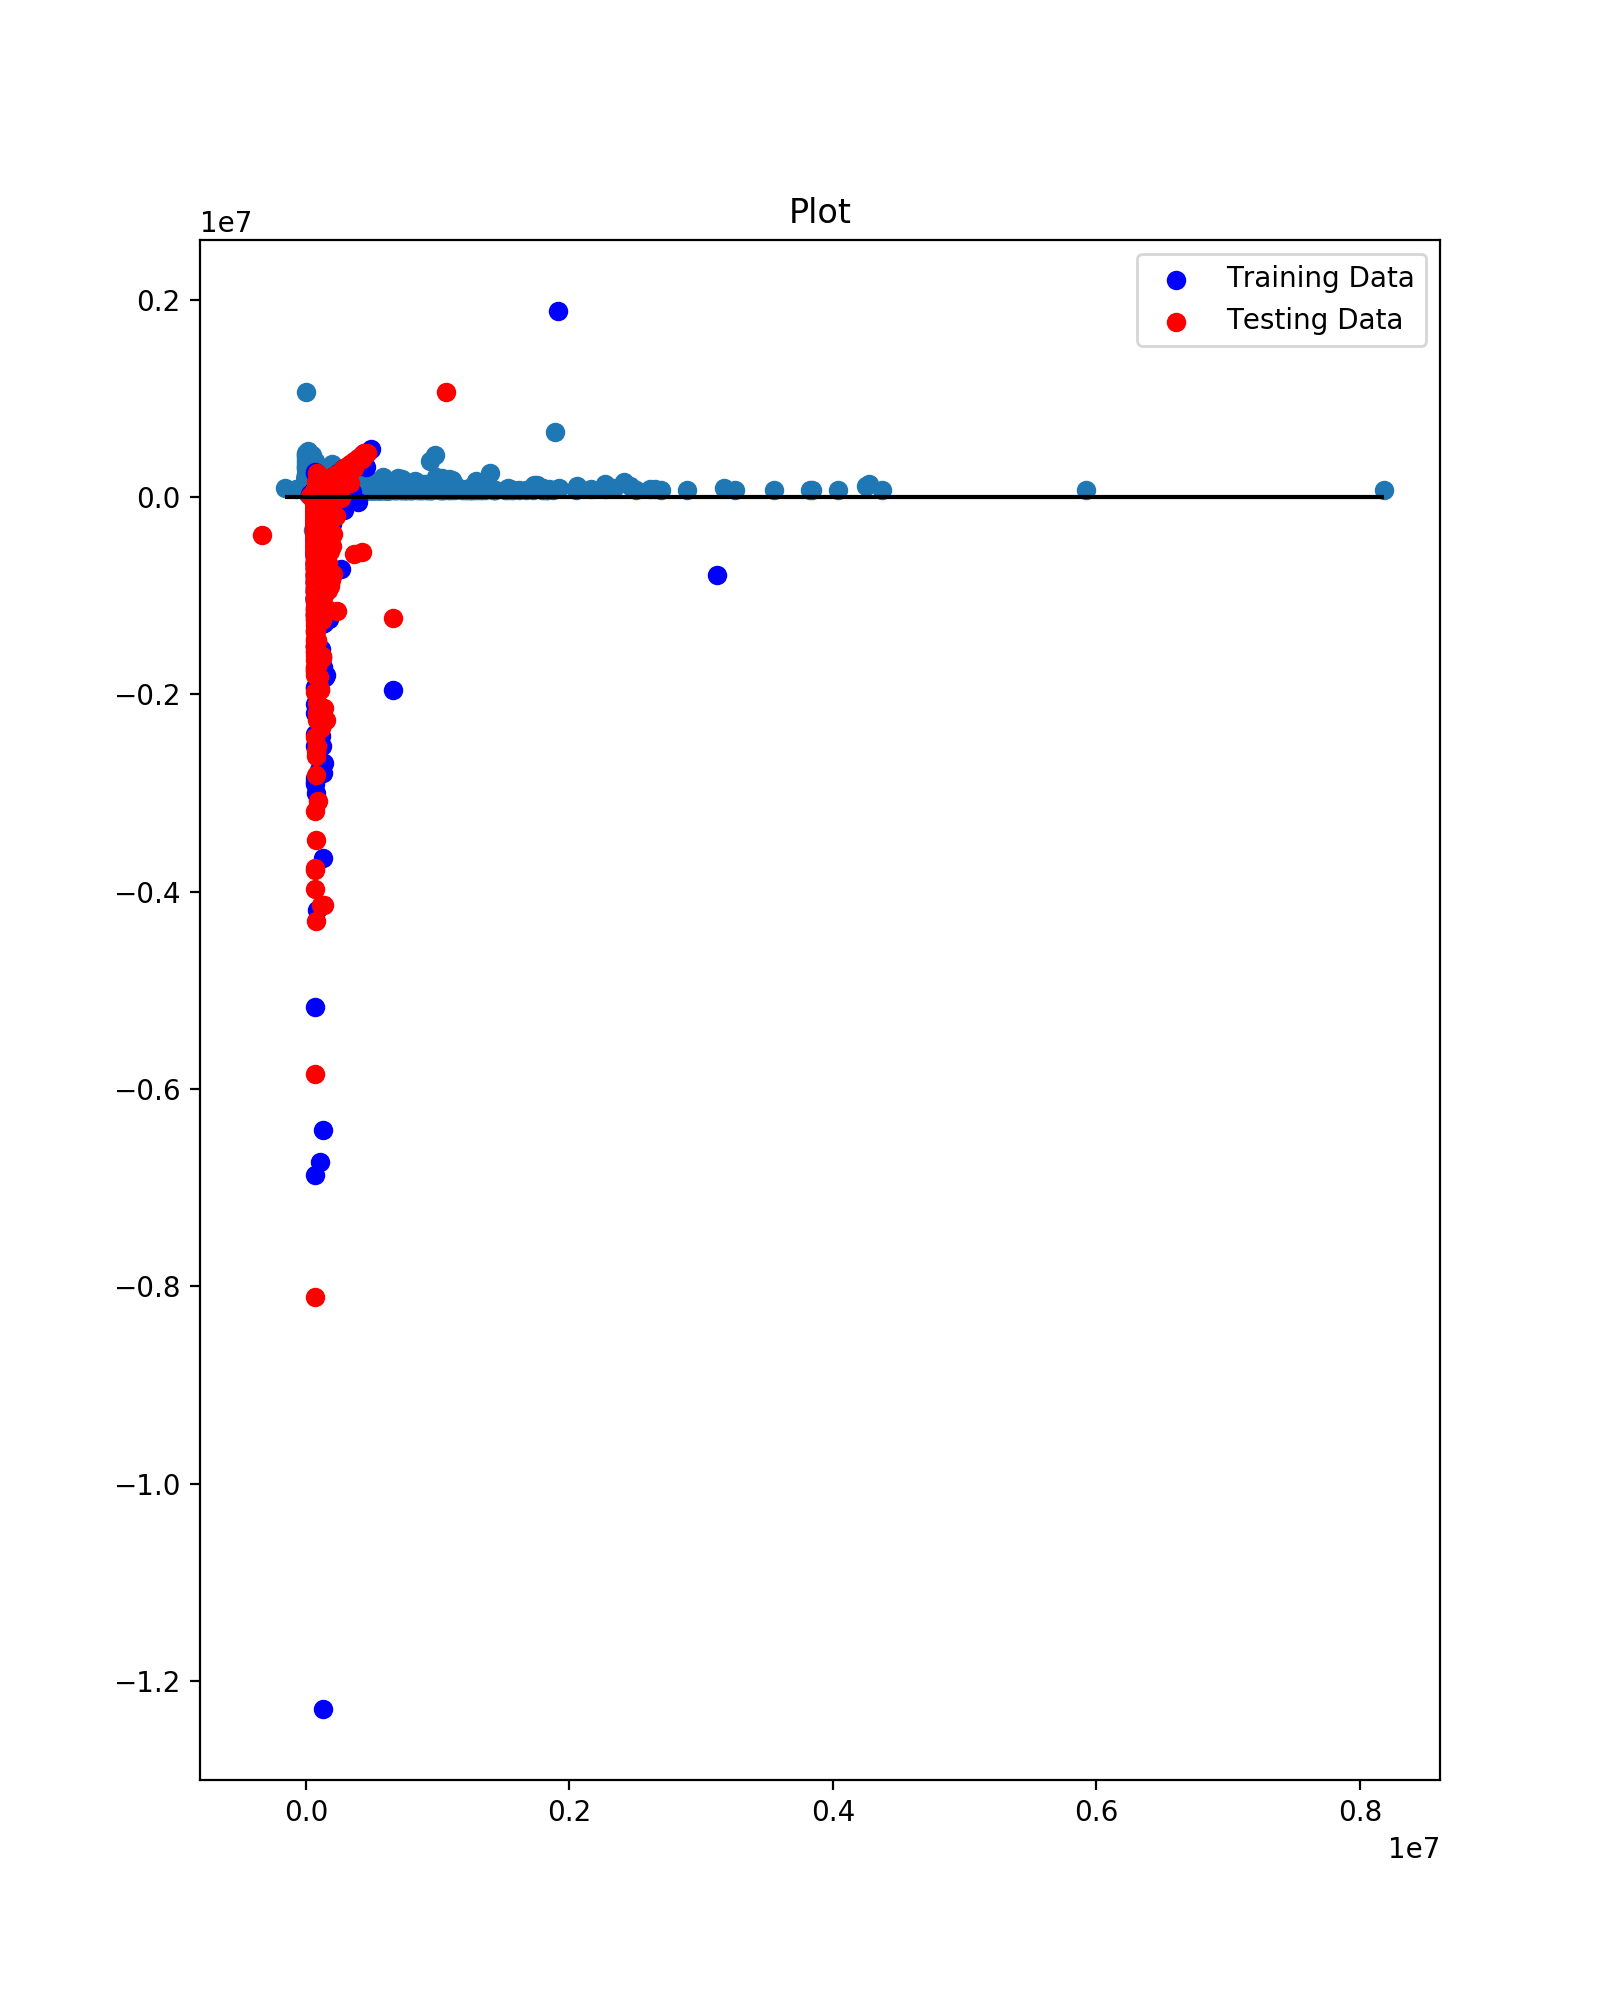

In [63]:
plt.figure(figsize=(8,10))
plt.scatter(y_test,predictions)
plt.show()
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(x_test), model.predict(x_test) - y_test, c="red", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y_test.min(), xmax=y_test.max())
plt.title("Plot")
plt.savefig("Regression_curve.png")
plt.show()

In [39]:
print(f"Training Data Score: {model.score(X_train, y_train)}")
print(f"Testing Data Score: {model.score(x_test, y_test)}")

Training Data Score: 0.02770277349322536
Testing Data Score: 0.0031596648153310314
